In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

# Data

In [2]:
df = pd.read_csv('/Users/beyazituysal/Documents/PythonProjects/MLalgorithm/datasets/heart_classification_data.csv')

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


We cannot call this code as there is no object64 in the dataset

code = df.describe(exclude=np.number).T

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [7]:
# Showing float columns
df.select_dtypes('float64').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   oldpeak  303 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


In [8]:
# Showing float columns
df.select_dtypes('int64').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trtbps    303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   restecg   303 non-null    int64
 7   thalachh  303 non-null    int64
 8   exng      303 non-null    int64
 9   slp       303 non-null    int64
 10  caa       303 non-null    int64
 11  thall     303 non-null    int64
 12  output    303 non-null    int64
dtypes: int64(13)
memory usage: 30.9 KB


#### Before EDA I'll chance the column names 

In [9]:
df.rename(columns={"cp": "chest_pain",
                   "trtbps":"blood_pressure",
                   "chol":"cholestoral",
                   "fbs":"fasting_blood_sugar",
                   "thalachh":"max_heart_rate",
                   "exng":"angina",
                   "slp":"slope",
                   "caa": "n_vessels",
                   "output":"heart_attack"},inplace=True)

In [10]:
df.head()

,age,sex,chest_pain,blood_pressure,cholestoral,fasting_blood_sugar,restecg,max_heart_rate,angina,oldpeak,slope,n_vessels,thall,heart_attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# EDA

In [11]:
df.groupby('heart_attack').agg(['mean', 'median'])

age              sex        chest_pain         \
                   mean median      mean median       mean median   
heart_attack                                                        
0             56.601449   58.0  0.826087    1.0   0.478261    0.0   
1             52.496970   52.0  0.563636    1.0   1.375758    2.0   

             blood_pressure        cholestoral         ...    angina         \
                       mean median        mean median  ...      mean median   
heart_attack                                           ...                    
0                134.398551  130.0  251.086957  249.0  ...  0.550725    1.0   
1                129.303030  130.0  242.230303  234.0  ...  0.139394    0.0   

               oldpeak            slope        n_vessels            thall  \
                  mean median      mean median      mean median      mean   
heart_attack                                                                
0             1.585507    1.4  1.166667    1.0  1.166667    1.0  2.543478   
1             0.583030    0.2  1.593939    2.0  0.363636    0.0  2.121212   

                     
             median  
heart_attack         
0               3.0  
1               2.0  

[2 rows x 26 columns]

In [12]:
# Standard deviation
df.groupby('heart_attack').std()

,age,sex,chest_pain,blood_pressure,cholestoral,fasting_blood_sugar,restecg,max_heart_rate,angina,oldpeak,slope,n_vessels,thall
heart_attack,,,,,,,,,,,,,
0,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762
1,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752


## Box Plot

<AxesSubplot: xlabel='heart_attack', ylabel='oldpeak'>

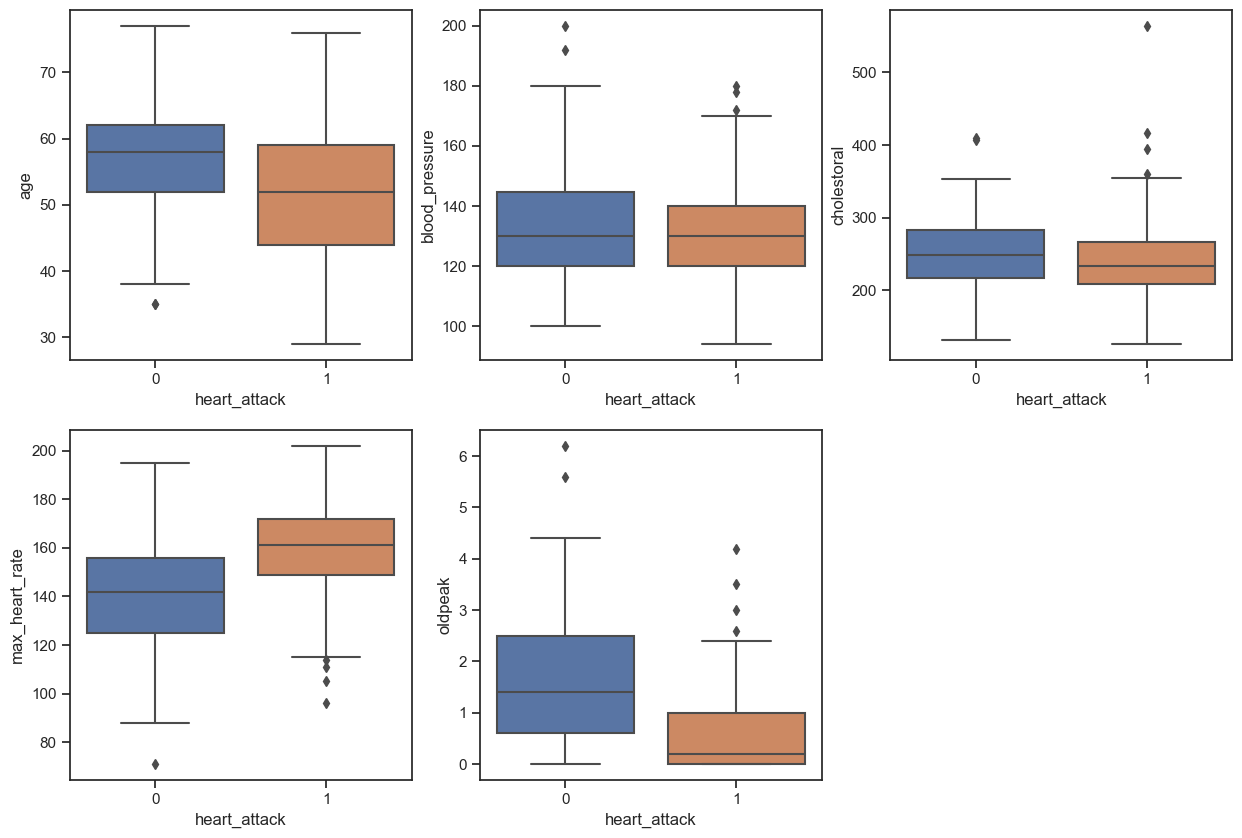

In [13]:
sns.set(style='ticks')
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(x='heart_attack', y='age', data=df)
plt.subplot(2,3,2)
sns.boxplot(x='heart_attack', y='blood_pressure', data=df)
plt.subplot(2,3,3)
sns.boxplot(x='heart_attack', y='cholestoral', data=df)
plt.subplot(2,3,4)
sns.boxplot(x='heart_attack', y='max_heart_rate', data=df)
plt.subplot(2,3,5)
sns.boxplot(x='heart_attack', y='oldpeak', data=df)

##### There are too many outliers in the dataset.

## Violin Plot

<AxesSubplot: xlabel='heart_attack', ylabel='oldpeak'>

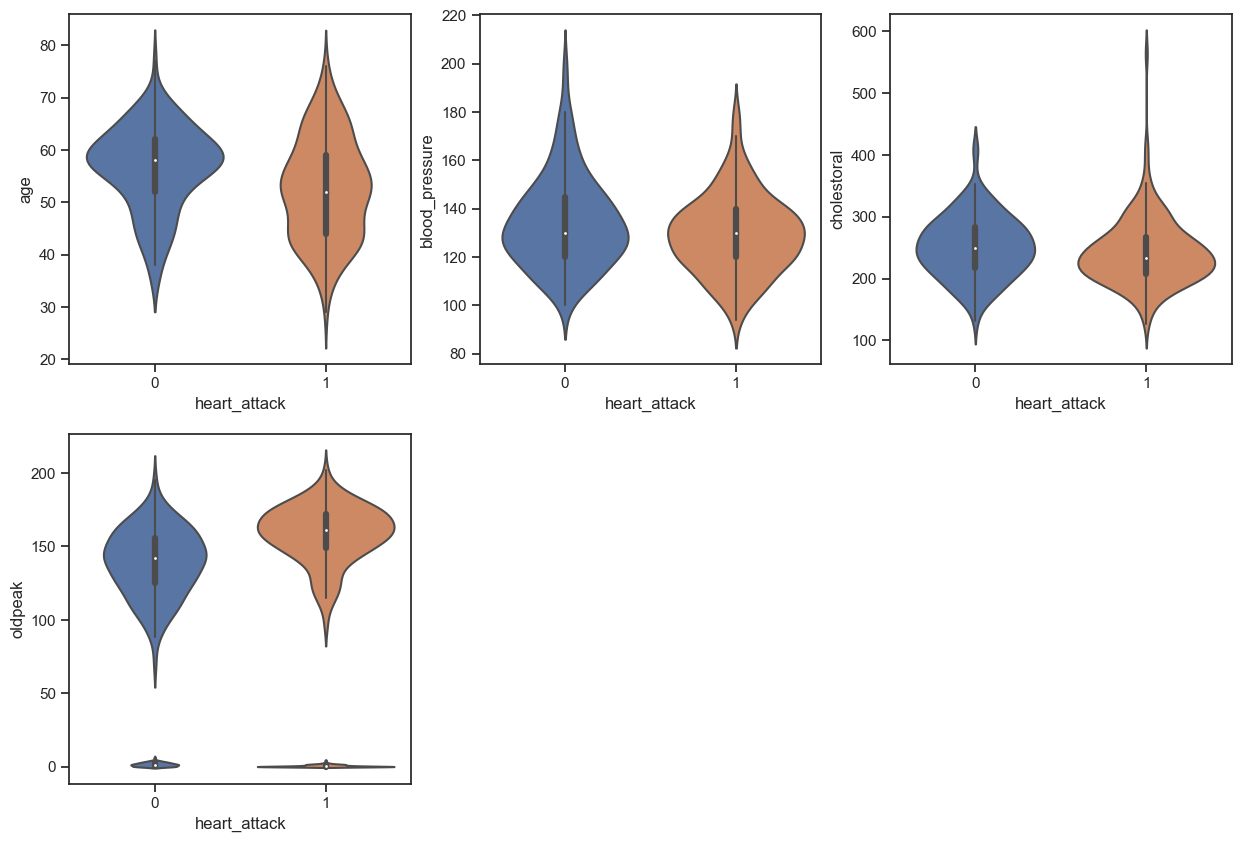

In [14]:
sns.set(style='ticks')
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.violinplot(x='heart_attack', y='age', data=df)
plt.subplot(2,3,2)
sns.violinplot(x='heart_attack', y='blood_pressure', data=df)
plt.subplot(2,3,3)
sns.violinplot(x='heart_attack', y='cholestoral', data=df)
plt.subplot(2,3,4)
sns.violinplot(x='heart_attack', y='max_heart_rate', data=df)
plt.subplot(2,3,4)
sns.violinplot(x='heart_attack', y='oldpeak', data=df)

In [15]:
df.describe()

,age,sex,chest_pain,blood_pressure,cholestoral,fasting_blood_sugar,restecg,max_heart_rate,angina,oldpeak,slope,n_vessels,thall,heart_attack
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### The relationship between the features themselves

[]

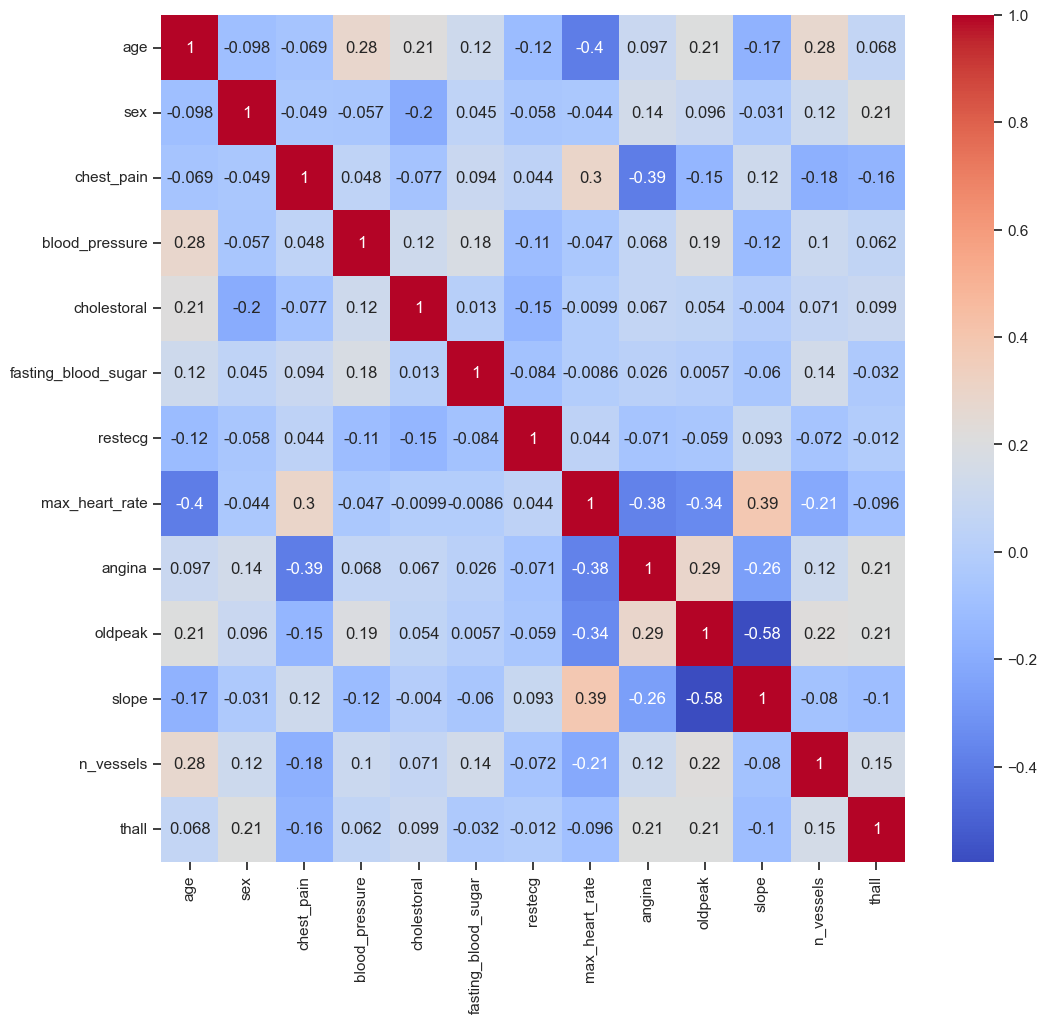

In [16]:
df_without_output = df.drop(['heart_attack'], axis=1)
plt.figure(figsize=(12,11))
sns.heatmap(df_without_output.corr(), annot=True, cmap='coolwarm')
plt.plot()

##### Correlation between features and heart attack

In [17]:
df_corr = df.assign(sex = df['sex'].replace({'Female':0, 'Male':1})).corr()
df_corr['heart_attack']

age                   -0.225439
sex                   -0.280937
chest_pain             0.433798
blood_pressure        -0.144931
cholestoral           -0.085239
fasting_blood_sugar   -0.028046
restecg                0.137230
max_heart_rate         0.421741
angina                -0.436757
oldpeak               -0.430696
slope                  0.345877
n_vessels             -0.391724
thall                 -0.344029
heart_attack           1.000000
Name: heart_attack, dtype: float64

These two have the highest compatibility score, but I don't like the resulting graphic.(0.39)

<AxesSubplot: title={'center': 'Slope and Max_heart_rate'}, xlabel='slope', ylabel='max_heart_rate'>

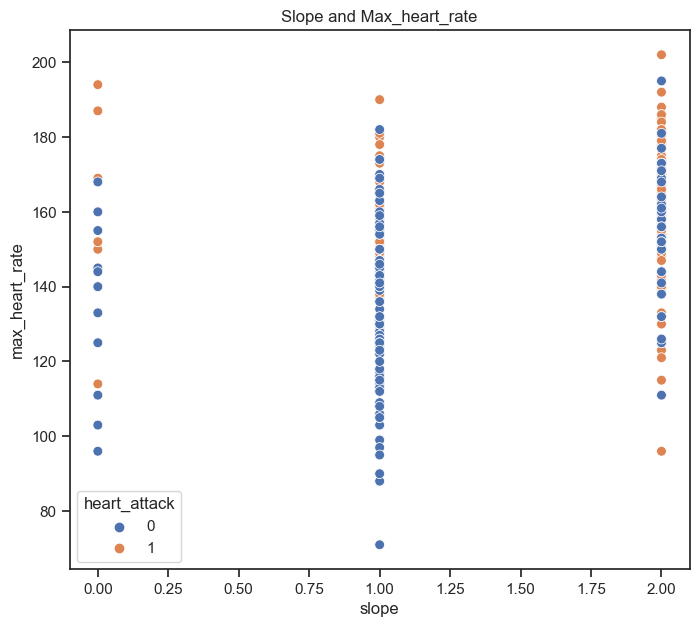

In [18]:
plt.figure(figsize=(8,7))
plt.title('Slope and Max_heart_rate')
sns.scatterplot(data=df,x='slope',y='max_heart_rate',hue='heart_attack',s=50)

<AxesSubplot: title={'center': 'Slope and Max_heart_rate'}, xlabel='age', ylabel='blood_pressure'>

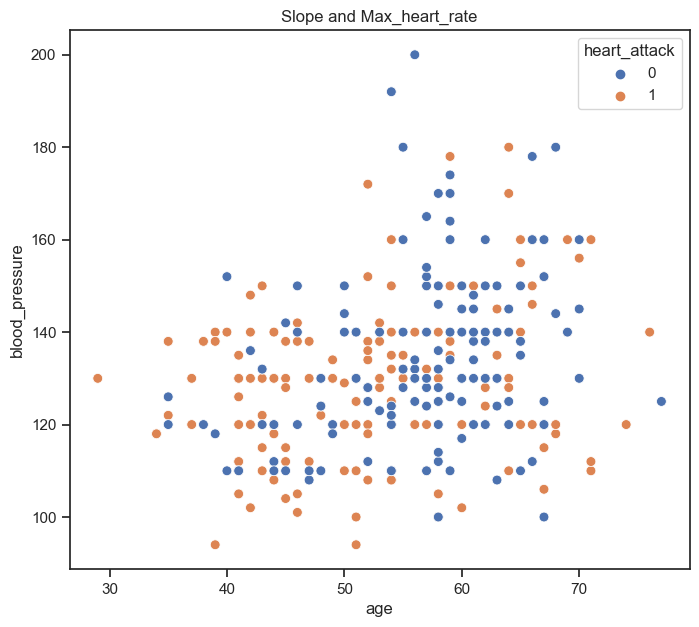

In [19]:
plt.figure(figsize=(8,7))
plt.title('Slope and Max_heart_rate')
sns.scatterplot(data=df,x='age',y='blood_pressure',hue='heart_attack',s=50)

In [20]:
# Chance the sex column, 0 is Female, 1 is Male
df_cpy = df.copy()
df_cpy['sex'].replace({0:'Female', 1:'Male'}, inplace=True)

Count plot of categorical features

In [21]:
df.head()

,age,sex,chest_pain,blood_pressure,cholestoral,fasting_blood_sugar,restecg,max_heart_rate,angina,oldpeak,slope,n_vessels,thall,heart_attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Text(0.5, 0, '')

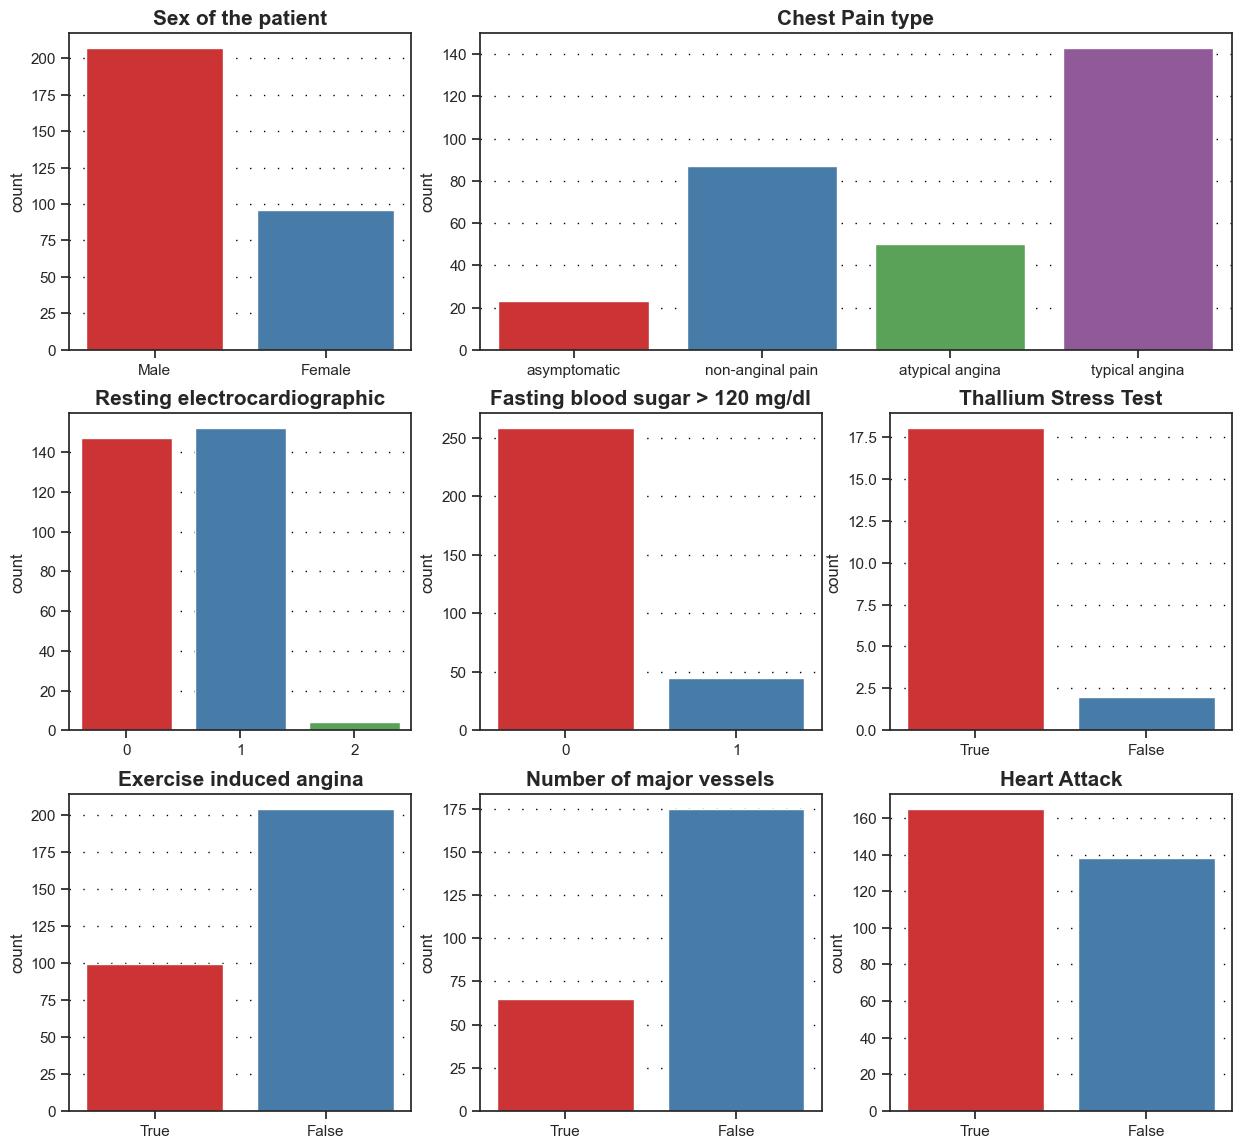

In [22]:
fig = plt.figure(figsize=(15,14))
gs  = fig.add_gridspec(3,3)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1:])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

# Sex 
ax1.set_title('Sex of the patient',fontweight ="bold",fontsize=15)
ax1.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax1,data=df_cpy,x='sex',palette = 'Set1')
ax1.set_xlabel("")

# chest pain
leges = {0: 'typical angina',1: 'atypical angina',2: 'non-anginal pain',3: 'asymptomatic'}
ax2.set_title('Chest Pain type',fontweight ="bold",fontsize=15)
ax2.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax2,data=df.assign(chest_pain = df['chest_pain'].replace(leges)),x='chest_pain',palette = 'Set1')
ax2.set_xlabel("")

# restecg 
ax3.set_title('Resting electrocardiographic',fontweight ="bold",fontsize=15)
ax3.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax3,data=df,x='restecg',palette = 'Set1')
ax3.set_xlabel("")

#  fasting_blood_sugar
ax4.set_title('Fasting blood sugar > 120 mg/dl',fontweight ="bold",fontsize=15)
ax4.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax4,data=df,x='fasting_blood_sugar',palette = 'Set1')
ax4.set_xlabel("")

# thall
ax5.set_title('Thallium Stress Test',fontweight ="bold",fontsize=15)
ax5.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax5,data=df,x='thall',order=[True,False],palette = 'Set1')
ax5.set_xlabel("")

# angina
ax6.set_title('Exercise induced angina',fontweight ="bold",fontsize=15)
ax6.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax6,data=df,x='angina',order=[True,False],palette = 'Set1')
ax6.set_xlabel("")

# n_vessels
ax7.set_title('Number of major vessels',fontweight ="bold",fontsize=15)
ax7.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax7,data=df,x='n_vessels',order=[True,False],palette = 'Set1')
ax7.set_xlabel("")

# heart_attack
ax8.set_title('Heart Attack',fontweight ="bold",fontsize=15)
ax8.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax8,data=df,x='heart_attack',order=[True,False],palette = 'Set1')
ax8.set_xlabel("")

# Classification

### Train and Test

In [23]:
X = df.drop(['heart_attack'],axis=1)
y = df.heart_attack

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

### LogisticRegression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
# Fit
lr = LogisticRegression()
lr.fit(X_train,y_train)

# prediction
y_pred = lr.predict(X_test)

In [27]:
lr_score = accuracy_score(y_test,y_pred)
print(f"Score %{(lr_score*100):.2f}")

Score %83.52


In [28]:
con_mat = confusion_matrix(y_test,y_pred)
print(con_mat)

[[33 11]
 [ 4 43]]


In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81        44
           1       0.80      0.91      0.85        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



### KNeighborsClassifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier

Max Train Score : %100.0 - K : [1]
Max Test Score : %74.72527472527473 - Best K : [17, 18]


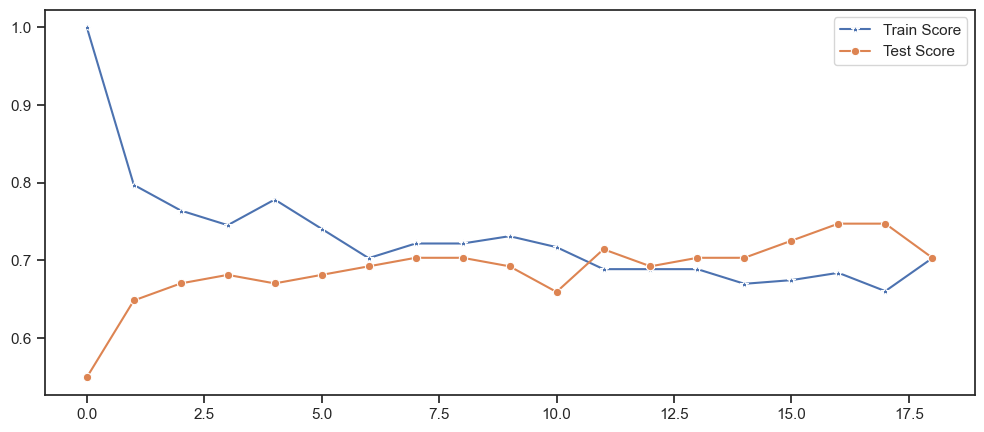

In [31]:
test_score = []
train_score = []

for i in range(1, 20):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

# max scores
max_train_score = max(train_score)
train_score_ind = [i for i, v in enumerate(train_score) if v == max_train_score]
 
max_test_score = max(test_score)
test_score_ind = [i for i, v in enumerate(test_score) if v == max_test_score]


print(f'Max Train Score : %{max_train_score * 100} - K : {list(map(lambda x: x+1, train_score_ind))}')
print(f'Max Test Score : %{max_test_score * 100} - Best K : {list(map(lambda x: x+1, test_score_ind))}')

# graph

plt.figure(figsize=(12, 5))
p = sns.lineplot(train_score, marker="*", label="Train Score")
p = sns.lineplot(test_score, marker="o", label="Test Score")
plt.show()

### GaussianNB

In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
# Train the Random Forest classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = gnb.predict(X_test)

In [34]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 80.22%


In [35]:
con_mat = confusion_matrix(y_test,y_pred)
print(con_mat)

[[32 12]
 [ 6 41]]


In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        44
           1       0.77      0.87      0.82        47

    accuracy                           0.80        91
   macro avg       0.81      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91



### RandomForestClassifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
# Train the Random Forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = rfc.predict(X_test)

In [39]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 82.42%


In [40]:
con_mat = confusion_matrix(y_test,y_pred)
print(con_mat)

[[33 11]
 [ 5 42]]


In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.75      0.80        44
           1       0.79      0.89      0.84        47

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



# Summary / Özet

## TR

Kalp krizi veri seti için %83 çok düşük bir oran ama çok fazla artıcağını sanmıyorum çünkü veri setimiz çok az sadece 303 tane veri var ve bunların 202 tanesini eğitim 101 tanesini test için kullanıyoruz (%33). Yani oranı artırmak istersek veri setine daha fazla veri eklememiz gerekmektedir. Veri setinde biraz aykırı değer var evet bunları düzeltmek orana etki edebilir ama zaten veri setinin küçüklüğü nedeni ile orjinal orandan uzaklaşmış olucaz, ve o verilerin gerçek veriler olma olasılıkları da var bunlarıda göz önünde bulundurmamız lazım.

## ENG

83% is very low rate for heart attack dataset, but I don't think it will increase much because our dataset is very small, only 303 data and we use 202 of them for training and 101 for testing (33%). So if we want to increase the rate, we need to add more data to the dataset. There are some outliers in the data set, Fixing them may change the ratio. The dataset is already small, so we deviate the original dataset, and they can be a real values.